In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB

In [3]:
data = pd.read_csv("spam.csv")
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Exploratory Data Analysis

In [4]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
data.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [8]:
data['Length']=data['Message'].apply(len)
data.head()

,Category,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#Data Visualization

<AxesSubplot:>

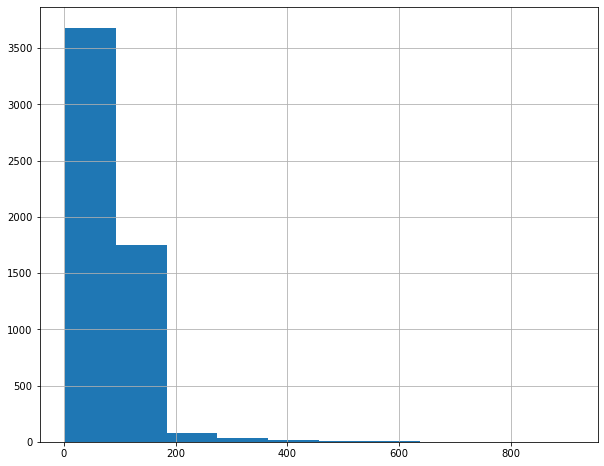

In [9]:
data.Length.hist(figsize=(10,8))

<AxesSubplot:ylabel='Frequency'>

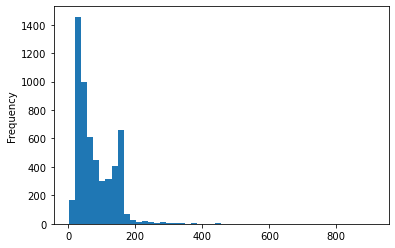

In [12]:
data['Length'].plot(bins=50,kind='hist')

In [14]:
data.Length.describe()

count    5572.000000
mean       80.368988
std        59.926946
min         2.000000
25%        35.750000
50%        61.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

In [15]:
data[data['Length']==910]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [16]:
data[data['Length']==2]['Message'].iloc[0]

'Ok'

In [17]:
data.shape

(5572, 3)

In [18]:
data['spam']=data.Category.apply(lambda x: 1 if x=='spam' else 0)

In [19]:
data=data.drop("Category",axis=1)

In [20]:
data.head()

,Message,Length,spam
0,"Go until jurong point, crazy.. Available only ...",111,0
1,Ok lar... Joking wif u oni...,29,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,U dun say so early hor... U c already then say...,49,0
4,"Nah I don't think he goes to usf, he lives aro...",61,0


In [21]:
x=data.Message
y=data.spam

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
cv=CountVectorizer()

In [25]:
x_train_coun = cv.fit_transform(x_train.values)#if we not give .values it will contain index also

In [26]:
x_train_coun.shape

(4457, 7701)

In [27]:
model=MultinomialNB()

In [28]:
model.fit(x_train_coun,y_train)

MultinomialNB()

In [29]:
x_test_coun=cv.transform(x_test.values)

In [30]:
x_test_coun.shape

(1115, 7701)

In [31]:
x_test.shape

(1115,)

In [32]:
model.score(x_test_coun,y_test)

0.9919282511210762

In [35]:
y_pred=model.predict(x_test_coun)

In [37]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_pred,y_test)
con

array([[966,   9],
       [  0, 140]], dtype=int64)

In [27]:
#prediction
emails=['can we get together to watch football game tommorow?',
        'how are you?',
        'your account is currently locked for security reason',
        'upto 20% discount on parking,exclusive offer just for you']

In [28]:
email_counter=cv.transform(emails)
model.predict(email_counter)

array([0, 0, 1, 1], dtype=int64)

In [34]:
#pipeline
from sklearn.pipeline import Pipeline
p=Pipeline([('v',CountVectorizer()),('mnb',MultinomialNB())])

In [35]:
p.fit(x_train,y_train)

Pipeline(steps=[('v', CountVectorizer()), ('mnb', MultinomialNB())])

In [36]:
p.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)